# Shift fit get percentiles for whole year

In [1]:
# necessary: netcdf4-python, regionmask, (xarray, geopandas), cartopy, openpyxl, (statsmodels??)

import numpy as np
import pandas as pd
import os, glob, re 
import math
import xarray as xr
import geopandas as gpd
import regionmask as regionmask
import dask
import matplotlib.pyplot as plt
import netCDF4
import matplotlib.patches as mpatches


%matplotlib inline

#plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import my variables settings functions from other scripts
from settings_ana import *

# import fxns 
from functions_ana import *
from utils_ana import *
from plotscript import *

# import other packages/modules 
sys.path.append(os.path.join(os.environ['VSC_DATA_VO_USER'],'demographics4climate/'))
from population_demographics import * 

In [2]:
flags['models']='ISIMIP3a'
dirname = 'output_shift-fit' 

da_list = []

for i in range(len(datasets)):
    dataset = datasets[i]
    filepath = glob.glob(os.path.join('/data/brussel/vo/000/bvo00012/vsc10419/attr-hw/output', 
                                      f'output_shift-fit/forster2024/WBGT/ISIMIP3a/{dataset}/*_obsclim_WBGT_params_shift_loc_mon_loglike_1901_2019.nc'))[0]
    da = xr.open_dataarray(filepath).expand_dims("dataset").assign_coords(dataset=("dataset", [dataset]))
    da_list.append(da)
    
    da_params = xr.concat(da_list, dim="dataset")

In [6]:
da_params_sel = da_params.sel(lat=slice(20,17),lon=slice(80,84))

In [7]:
da_params_sel

<xarray.DataArray 'fit_params' (dataset: 3, month: 12, lat: 6, lon: 8, params: 3)>
array([[[[[ 2.28599984e+01,  1.79441905e-01,  1.66303651e+00],
          [ 2.25609442e+01,  1.39430702e-01,  1.61391990e+00],
          [ 2.22964610e+01,  1.87776638e-01,  1.64515981e+00],
          ...,
          [ 2.17351134e+01,  2.89023792e-01,  1.65971331e+00],
          [ 2.13222734e+01,  1.79125170e-01,  1.65058351e+00],
          [ 2.16925356e+01,  2.25818652e-01,  1.59248670e+00]],

         [[ 2.33107989e+01,  4.08719559e-01,  1.56852182e+00],
          [ 2.30994991e+01,  3.61154374e-01,  1.55306759e+00],
          [ 2.25296675e+01,  3.69101648e-01,  1.56995313e+00],
          ...,
          [ 2.22500953e+01,  1.92640744e-01,  1.57506206e+00],
          [ 2.17737694e+01,  1.59274375e-01,  1.55931912e+00],
          [ 2.16847240e+01,  3.27202312e-01,  1.44851236e+00]],

         [[ 2.33968820e+01,  6.60508919e-01,  1.51436299e+00],
          [ 2.34213863e+01,  6.25311809e-01,  1.48764130e+00],
          [ 2.27923157e+01,  5.38944502e-01,  1.50220144e+00],
          ...,
...
          ...,
          [ 2.21935057e+01,  9.90511228e-01,  1.30521260e+00],
          [ 2.28182845e+01,  1.06378527e+00,  1.37174651e+00],
          [ 2.27233146e+01,  1.07563219e+00,  1.22437493e+00]],

         [[ 2.33420190e+01,  8.61408488e-01,  1.35881499e+00],
          [ 2.29390040e+01,  8.27630996e-01,  1.28745766e+00],
          [ 2.30303775e+01,  8.29377983e-01,  1.25502907e+00],
          ...,
          [ 2.29391058e+01,  1.24849605e+00,  1.31334926e+00],
          [ 2.32229720e+01,  1.34877838e+00,  1.26275645e+00],
          [ 2.11998298e+01,  1.12869977e+00,  9.29911837e-01]],

         [[ 2.34826885e+01,  9.20278926e-01,  1.30253864e+00],
          [ 2.32911347e+01,  8.80598525e-01,  1.23797776e+00],
          [ 2.32856996e+01,  9.05439075e-01,  1.21480872e+00],
          ...,
          [ 2.27208997e+01,  1.41653157e+00,  1.15748443e+00],
          [ 2.14209280e+01,  1.16669404e+00,  8.81655391e-01],
          [ 2.11856342e+01,  1.23630275e+00,  9.54287707e-01]]]]])
Coordinates:
  * lon      (lon) float32 80.25 80.75 81.25 81.75 82.25 82.75 83.25 83.75
  * lat      (lat) float32 19.75 19.25 18.75 18.25 17.75 17.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * params   (params) object 'b0' 'b1' 'sigma'
  * dataset  (dataset) <U11 'GSWP3-W5E5' '20CRv3-ERA5' '20CRv3-W5E5'

In [5]:
da_params_sel

<xarray.DataArray 'fit_params' (dataset: 3, month: 12, lat: 0, lon: 8, params: 3)>
array([], shape=(3, 12, 0, 8, 3), dtype=float64)
Coordinates:
  * lon      (lon) float32 80.25 80.75 81.25 81.75 82.25 82.75 83.25 83.75
  * lat      (lat) float32 
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * params   (params) object 'b0' 'b1' 'sigma'
  * dataset  (dataset) <U11 'GSWP3-W5E5' '20CRv3-ERA5' '20CRv3-W5E5'

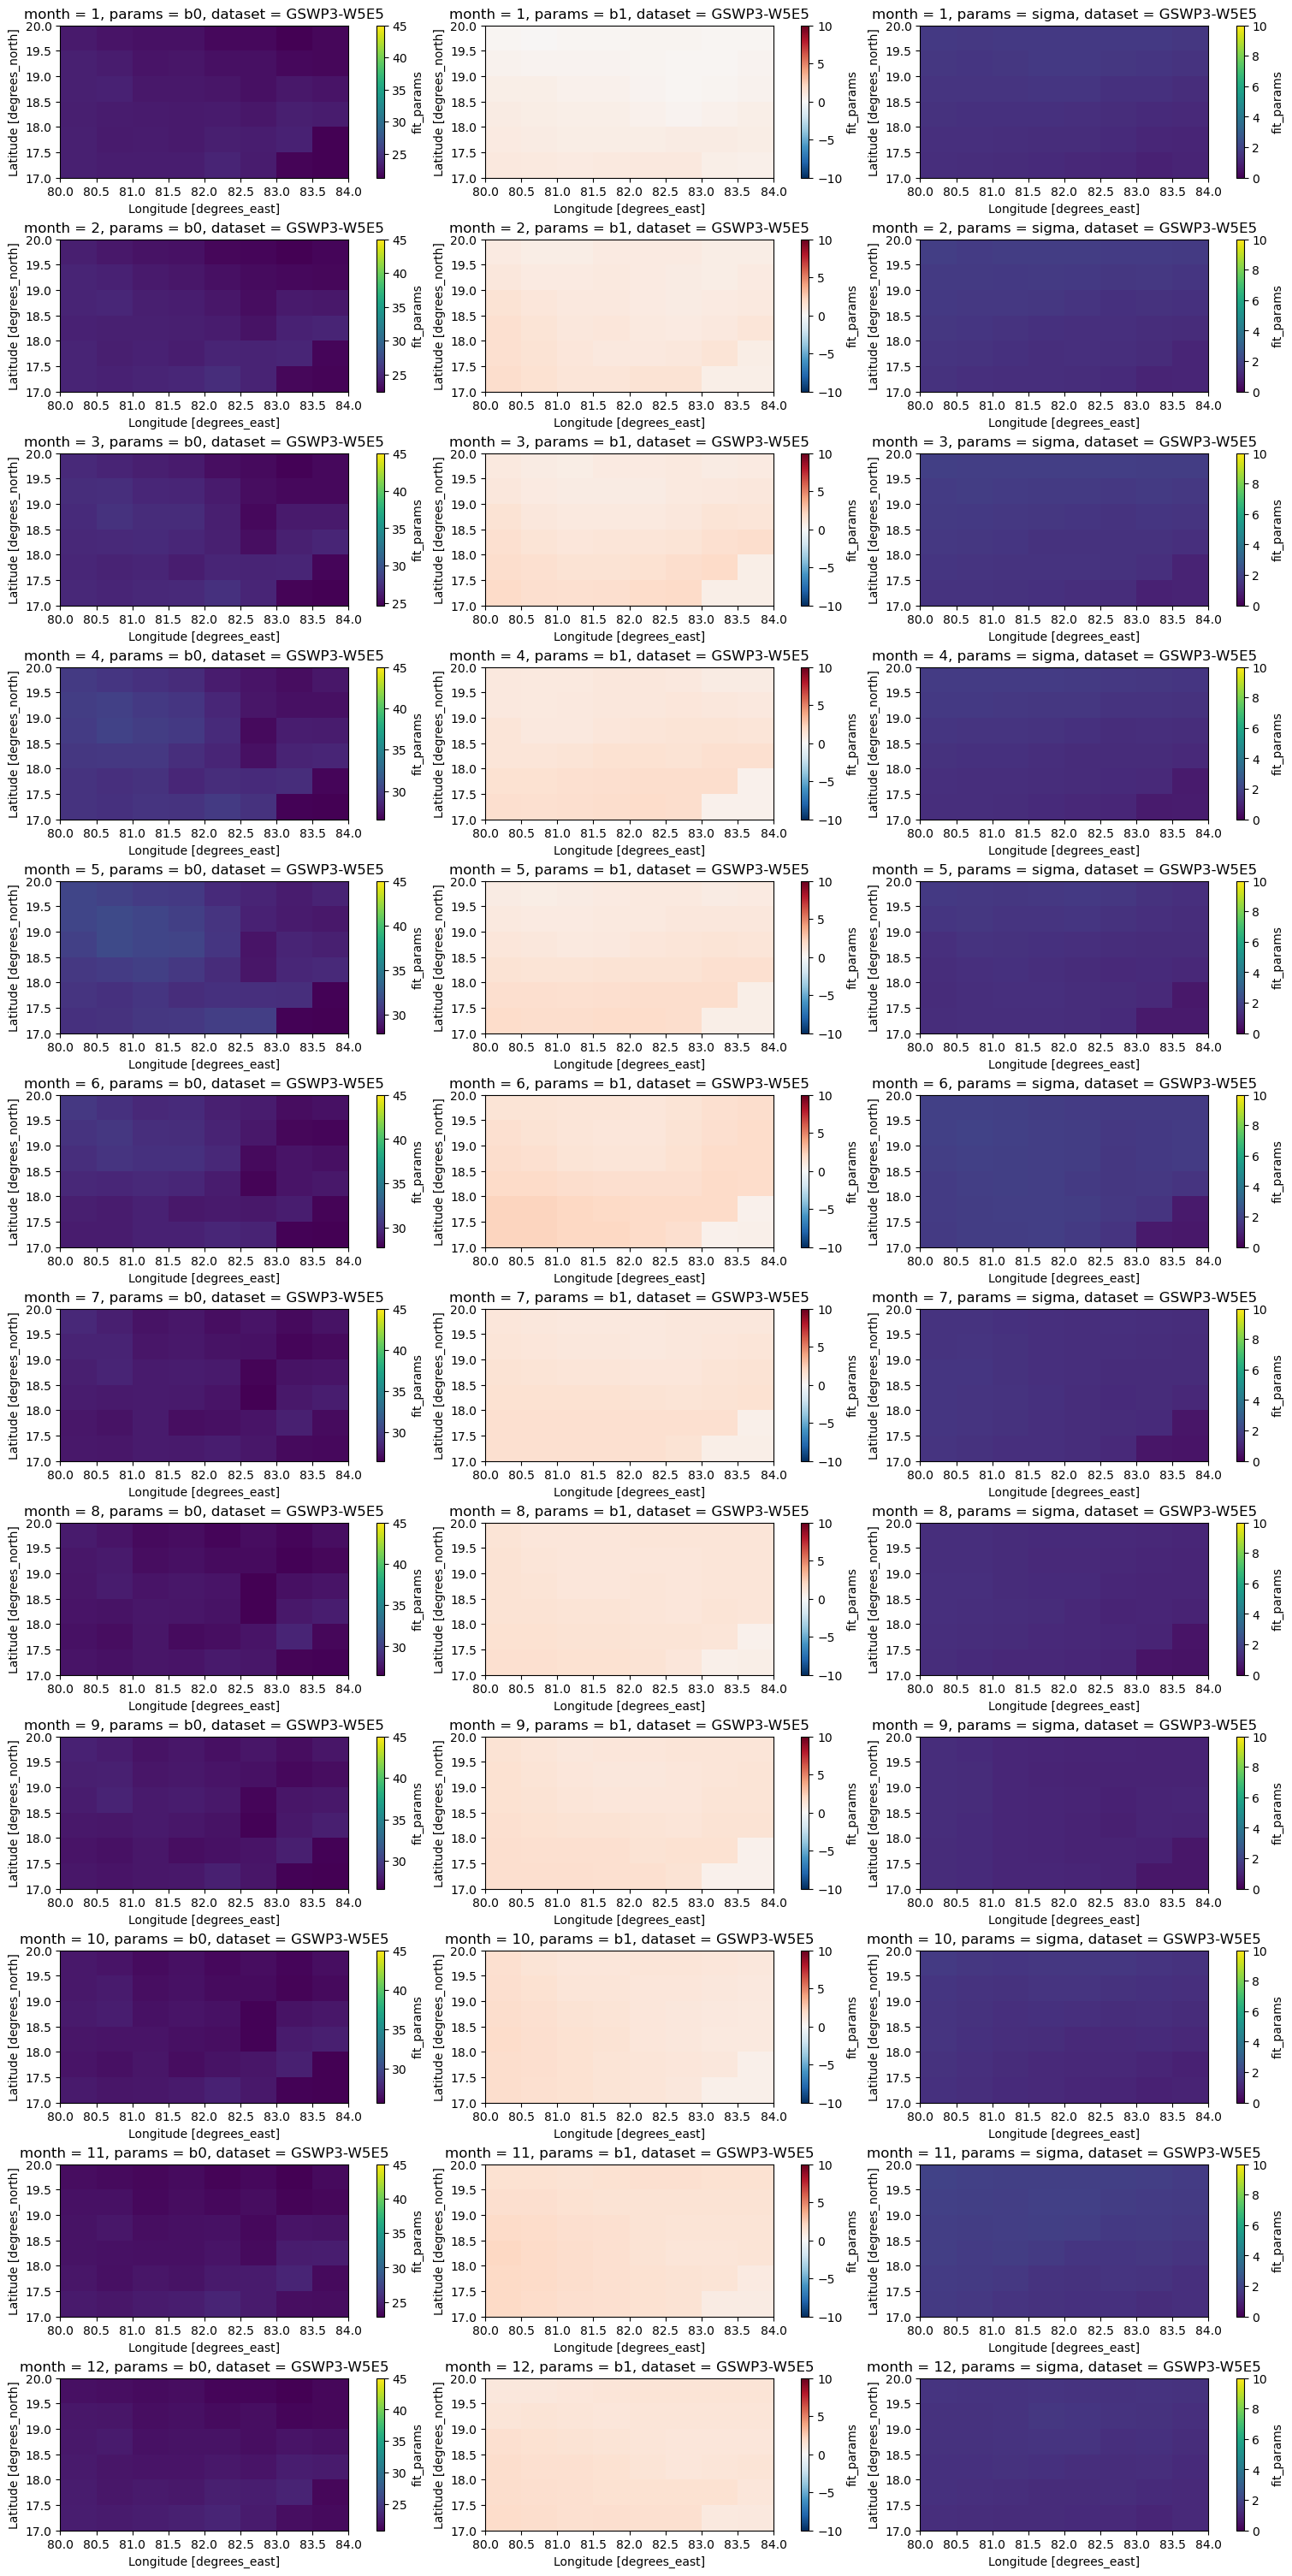

In [16]:
fig, axes = plt.subplots(12,3,figsize=(15,30), layout='constrained')

axes=axes.flatten()

j=0
for i in range(1,13):
    da_params_sel.isel(dataset=0).sel(month=i,params='b0').plot(ax=axes[j],cmap='viridis',vmax=45)
    da_params_sel.isel(dataset=0).sel(month=i,params='b1').plot(ax=axes[j+1], vmin=-10,vmax=10,cmap='RdBu_r')
    da_params_sel.isel(dataset=0).sel(month=i,params='sigma').plot(ax=axes[j+2],vmin=0, vmax=10)
    j+=3

## Try to do random sampling

In [17]:
da_params = da_params_sel

In [20]:
df_gmst_obs_annual = pd.read_csv(os.path.join('../../data/gmst/gmst-obs/forster2024/annual_averages.csv')).rename(
    columns={'timebound_lower':'year'}).set_index('year')[['gmst']]
gmst_smo = pd.DataFrame(apply_lowess(df_gmst_obs_annual, df_gmst_obs_annual.index, ntime=4))

In [22]:
from scipy.stats import norm

year_pres = 2023
GWI=1.3 

gmst_pres = float(gmst_smo.loc[year_pres]) # take smoothed or not smoothed covariate ?? 
gmst_pi = float(gmst_pres - GWI)

b0 = da_params.sel(params='b0')
b1 = da_params.sel(params='b1')


if len(da_params.params) >3:
    sigma_b0 = da_params.sel(params='sigma_b0')
    sigma_b1 = da_params.sel(params='sigma_b1')
    norm_pi, norm_pres = norm(loc=b0+b1*gmst_pi, scale=sigma_b0+sigma_b1*gmst_pi), norm(loc=b0+b1*gmst_pres, scale=sigma_b0+sigma_b1*gmst_pres)
elif len(da_params.params) ==3:
    sigma_b0 = da_params.sel(params='sigma')
    norm_pi, norm_pres = norm(loc=b0+b1*gmst_pi, scale=sigma_b0), norm(loc=b0+b1*gmst_pres, scale=sigma_b0)

/tmp/ipykernel_3385594/4165550042.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gmst_pres = float(gmst_smo.loc[year_pres]) # take smoothed or not smoothed covariate ??


In [23]:
norm_pi

In [49]:
# Parameters from da_params with coordinates (lat, lon, month, params)
b0 = da_params.sel(params='b0')
b1 = da_params.sel(params='b1')

# Handling different versions of sigma parameters
if len(da_params.params) > 3:
    sigma_b0 = da_params.sel(params='sigma_b0')
    sigma_b1 = da_params.sel(params='sigma_b1')
    mean_pi = b0 + b1 * gmst_pi
    mean_pres = b0 + b1 * gmst_pres
    std_pi = sigma_b0 + sigma_b1 * gmst_pi
    std_pres = sigma_b0 + sigma_b1 * gmst_pres
else:
    sigma_b0 = da_params.sel(params='sigma')
    mean_pi = b0 + b1 * gmst_pi
    mean_pres = b0 + b1 * gmst_pres
    std_pi = sigma_b0
    std_pres = sigma_b0

# Number of samples for Monte Carlo
n_samples = 10000

# Monte Carlo sampling function, reshaped to match the broadcasted dimensions
def monte_carlo_samples(mean, std_dev, size):
    """Draw Monte Carlo samples from normal distribution."""
    samples_shape = mean.shape + (size,)  # Add samples dimension at the end
    return norm.rvs(loc=mean, scale=std_dev, size=samples_shape)

# Apply Monte Carlo sampling across all grid cells
samples_pi = xr.apply_ufunc(
    monte_carlo_samples, mean_pi, std_pi,
    input_core_dims=[[], []],  # Scalar per grid cell
    output_core_dims=[['samples']],  # Output will add a `samples` dimension
    vectorize=True, dask='parallelized', kwargs={'size': n_samples}
)

coords = dict(month=("month", np.arange(1,13)))
month_lengths = xr.DataArray([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], dims="month", coords=coords)

# weigh the sample by month length
percentile_90 = samples_pi.weighted(month_lengths).quantile(0.9, dim=['samples','month'])



In [50]:
percentile_90

<xarray.DataArray 'fit_params' (dataset: 3, lat: 6, lon: 8)>
array([[[31.30561323, 31.00434851, 30.55871625, 30.53218952,
         29.82420457, 29.65052629, 29.12167655, 29.47288499],
        [31.25422942, 31.48829684, 31.02049055, 30.82701733,
         30.17874681, 29.46377839, 28.99816803, 28.99172327],
        [31.0532962 , 31.47290881, 31.1524166 , 31.05556385,
         30.35280919, 28.78435393, 29.57412156, 29.47800435],
        [30.69885131, 30.74092252, 30.82263106, 30.46134072,
         29.89766202, 28.76021894, 29.74948206, 29.88544361],
        [30.43280996, 30.2394586 , 30.43823988, 29.87052539,
         30.07348709, 29.99475529, 30.17625257, 28.02051124],
        [30.33827312, 30.28823968, 30.48632835, 30.49490481,
         30.7855    , 30.48730631, 28.0029709 , 27.8617994 ]],

       [[30.24930293, 29.81223831, 29.28163283, 28.98630868,
         29.20390979, 29.59115473, 29.60729917, 29.60760245],
        [30.4587754 , 30.05521917, 29.43534002, 29.07149387,
         28.9219888 , 28.59415416, 29.12017463, 30.25170666],
        [30.31921222, 30.26146373, 29.6209983 , 29.31676686,
         28.80430446, 27.92935125, 29.54831672, 30.5720593 ],
        [30.31828988, 30.41464975, 30.22574367, 29.66419087,
         28.56530619, 28.0576021 , 29.9487047 , 29.27862157],
        [30.30021588, 30.44924816, 30.42813191, 29.46770571,
         28.95518471, 29.39306249, 29.13601615, 27.9501335 ],
        [30.48412351, 30.41262292, 30.21805615, 30.09514823,
         29.69468021, 28.50550926, 27.99751667, 27.86950017]],

       [[31.58148821, 31.1814747 , 30.72565604, 30.6422035 ,
         29.95576972, 29.80073888, 29.26423616, 29.71755849],
        [31.56424849, 31.74152113, 31.18382964, 30.90382413,
         30.23970285, 29.62920492, 29.24917184, 29.29250099],
        [31.39118959, 31.79981243, 31.31957424, 31.21058056,
         30.46395118, 29.02629811, 29.94102216, 29.88263107],
        [31.10142113, 31.14484358, 31.19281669, 30.81095681,
         30.22171218, 29.09975167, 30.20574943, 30.38601252],
        [31.02791368, 30.7936607 , 30.9889044 , 30.385677  ,
         30.59546926, 30.57207686, 30.73737833, 27.94223377],
        [30.97491257, 30.88718744, 31.07676332, 31.08715331,
         31.40487756, 31.04406594, 28.00693978, 27.86249237]]])
Coordinates:
  * lon       (lon) float32 80.25 80.75 81.25 81.75 82.25 82.75 83.25 83.75
  * lat       (lat) float32 19.75 19.25 18.75 18.25 17.75 17.25
  * dataset   (dataset) <U11 'GSWP3-W5E5' '20CRv3-ERA5' '20CRv3-W5E5'
    params    <U5 'sigma'
    quantile  float64 0.9

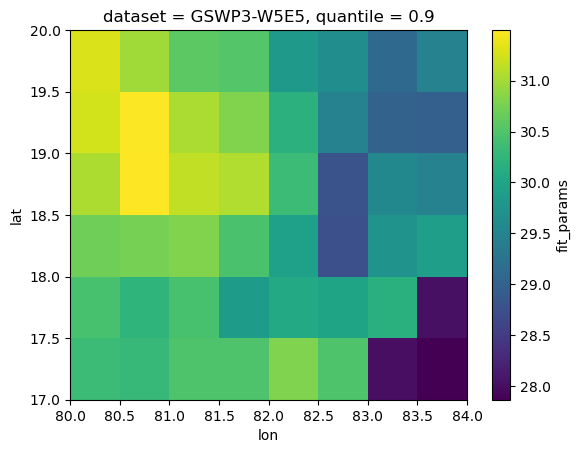

In [47]:
percentile_90.isel(dataset=0).plot()

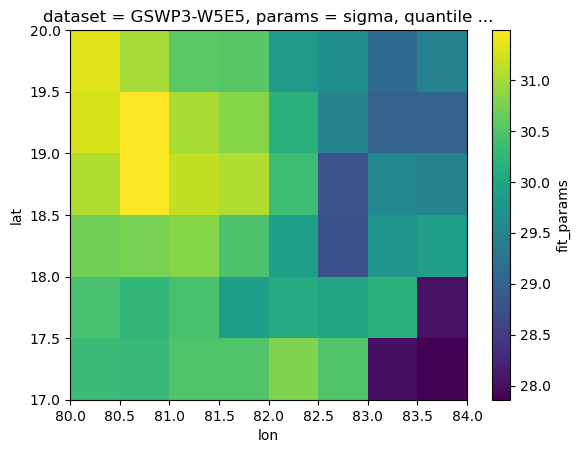

In [51]:
percentile_90.isel(dataset=0).plot()

In [68]:
def calc_nAHD_shift_fit_percentile(da_params, 
                                             percentile, 
                                             gmst_smo,
                                             year_pres=2022,
                                             GWI=1.3,
                                            mc_samplesize=1000,
                                            ):

    gmst_pres = float(gmst_smo.loc[year_pres]) # take smoothed or not smoothed covariate ?? 
    gmst_pi = float(gmst_pres - GWI)

    b0 = da_params.sel(params='b0')
    b1 = da_params.sel(params='b1')


    # if len(da_params.params) >3:
    #     sigma_b0 = da_params.sel(params='sigma_b0')
    #     sigma_b1 = da_params.sel(params='sigma_b1')
    #     norm_pi, norm_pres = norm(loc=b0+b1*gmst_pi, scale=sigma_b0+sigma_b1*gmst_pi), norm(loc=b0+b1*gmst_pres, scale=sigma_b0+sigma_b1*gmst_pres)
    # elif len(da_params.params) ==3:
    #     sigma_b0 = da_params.sel(params='sigma')
    #     norm_pi, norm_pres = norm(loc=b0+b1*gmst_pi, scale=sigma_b0), norm(loc=b0+b1*gmst_pres, scale=sigma_b0)

    # # Parameters from da_params with coordinates (lat, lon, month, params)
    # b0 = da_params.sel(params='b0')
    # b1 = da_params.sel(params='b1')
    
    # Handling different versions of sigma parameters
    if len(da_params.params) > 3:
        sigma_b0 = da_params.sel(params='sigma_b0')
        sigma_b1 = da_params.sel(params='sigma_b1')
        mean_pi = b0 + b1 * gmst_pi
        mean_pres = b0 + b1 * gmst_pres
        std_pi = sigma_b0 + sigma_b1 * gmst_pi
        std_pres = sigma_b0 + sigma_b1 * gmst_pres
    else:
        sigma_b0 = da_params.sel(params='sigma')
        mean_pi = b0 + b1 * gmst_pi
        mean_pres = b0 + b1 * gmst_pres
        std_pi = sigma_b0
        std_pres = sigma_b0

    # theoretical distributions per month in present 
    norm_pres = norm(loc=mean_pres, scale=std_pres)
    
    # Number of samples for Monte Carlo
    n_samples = mc_samplesize
    
    # Monte Carlo sampling function, reshaped to match the broadcasted dimensions
    def monte_carlo_samples(mean, std_dev, size):
        """Draw Monte Carlo samples from normal distribution."""
        samples_shape = mean.shape + (size,)  # Add samples dimension at the end
        return norm.rvs(loc=mean, scale=std_dev, size=samples_shape)
    
    # Apply Monte Carlo sampling across all grid cells
    samples_pi = xr.apply_ufunc(
        monte_carlo_samples, mean_pi, std_pi,
        input_core_dims=[[], []],  # Scalar per grid cell
        output_core_dims=[['samples']],  # Output will add a `samples` dimension
        vectorize=True, dask='parallelized', kwargs={'size': n_samples}
    )
    
    coords = dict(month=("month", np.arange(1,13)))
    
    days_in_month = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]) # ignoring leap years
    month_lengths = xr.DataArray(days_in_month, dims="month", coords=coords)
    
    # weigh the sample by month length and get qth percentile value 
    da_threshold = samples_pi.weighted(month_lengths).quantile(percentile, dim=['samples','month'])

    da_threshold = da_threshold.expand_dims('month', axis=1)
    # get p of exceedance of pi 90th percentile threshold in each grid cell 
    data = norm_pres.sf(da_threshold)
    da_p1 = xr.DataArray(
        data=data,
        dims=["dataset", "month", "lat", "lon", ],
        coords=dict(
            lon=(["lon"], da_params.lon.data),
            lat=(["lat"], da_params.lat.data),
            month=da_params.month.data,
            dataset=da_params.dataset.data) )
    

    # calc nAHD per month and per year
    da_nAHD_mo = (da_p1 -  (1 - percentile)) *  month_lengths 
    
    da_nAHD = da_nAHD_mo.sum(dim='month')


    return da_nAHD, da_nAHD_mo, da_threshold, da_p1

In [69]:
da_nAHD, da_nAHD_mo, da_threshold, da_p1 = calc_nAHD_shift_fit_percentile(da_params, 
                                             percentile=0.9, 
                                             gmst_smo=gmst_smo)

/tmp/ipykernel_3385594/1536162602.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  gmst_pres = float(gmst_smo.loc[year_pres]) # take smoothed or not smoothed covariate ??


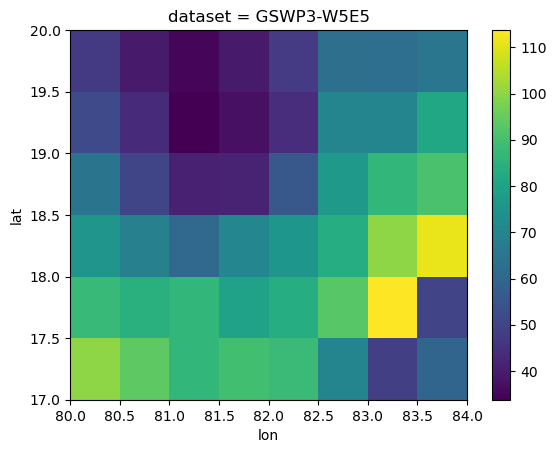

In [67]:
da_nAHD.isel(dataset=0).plot()
